## EfficientNet B1 deep learning framework for Mutli-class Skin Cancer Classification


Sameer Ali Khan
Chandana MN
Bandi Rupa Sravya

In [1]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.4 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import keras
import seaborn as sns
from glob import glob
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.utils import resample
from keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [3]:
skin_directory = os.path.join('..','/kaggle/input/skin-cancer-mnist-ham10000')

# creating a directory for all images present with us and bringing them under same directory
image_directory = {os.path.splitext(os.path.basename(x))[0]: x
                      for x in glob(os.path.join(skin_directory,'*', '*.jpg'))}

In [4]:
# creating a directory to display the type of cancer with label values present in dataset
cancer_type_dict = {
    'nv': 'melanocytic_nevi',
    'mel': 'melanoma',
    'vasc': 'vascular_lesions',
    'df': 'dermatofibroma',
    'bkl': 'benign_keratosis_like_lesions ',
    'bcc': 'basal_cell_carcinoma',
    'akiec': 'actinic_keratoses'
}

In [5]:
# creating data frame
skin_df = pd.read_csv(os.path.join(skin_directory, 'HAM10000_metadata.csv'))
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
# Creating New Columns for better readability
skin_df['path'] = skin_df['image_id'].map(image_directory.get)
skin_df['cell_type'] = skin_df['dx'].map(cancer_type_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [7]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2


In [8]:
skin_df.tail()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,actinic_keratoses,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,actinic_keratoses,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,actinic_keratoses,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,actinic_keratoses,0
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,melanoma,5


In [9]:
skin_df.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
9725,HAM_0004376,ISIC_0024843,akiec,histo,70.0,female,face,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,actinic_keratoses,0
6059,HAM_0003024,ISIC_0024768,nv,follow_up,35.0,female,trunk,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,melanocytic_nevi,4
4540,HAM_0001659,ISIC_0026564,nv,follow_up,35.0,male,lower extremity,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,melanocytic_nevi,4
3817,HAM_0004625,ISIC_0029346,nv,follow_up,40.0,male,upper extremity,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,melanocytic_nevi,4
7914,HAM_0000443,ISIC_0034271,nv,histo,35.0,female,back,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,melanocytic_nevi,4
8910,HAM_0007176,ISIC_0032144,nv,histo,30.0,male,lower extremity,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,melanocytic_nevi,4
799,HAM_0007355,ISIC_0024705,bkl,confocal,45.0,female,face,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2
4304,HAM_0003147,ISIC_0029168,nv,follow_up,50.0,female,trunk,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,melanocytic_nevi,4
8203,HAM_0007585,ISIC_0032347,nv,histo,35.0,female,back,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,melanocytic_nevi,4
8822,HAM_0004058,ISIC_0030802,nv,histo,80.0,female,lower extremity,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,melanocytic_nevi,4


In [10]:
#checking for the null values
skin_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [11]:
#Filling null values with mean
skin_df['age'] = skin_df['age'].fillna(skin_df['age'].mean())

In [12]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [13]:
skin_df.shape

(10015, 10)

In [14]:
skin_df.dtypes

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object

In [15]:
skin_df.describe()

,age,cell_type_idx
count,10015.000000,10015.000000
mean,51.863828,3.623964
std,16.920252,1.208859
min,0.000000,0.000000
25%,40.000000,4.000000
50%,50.000000,4.000000
75%,65.000000,4.000000
max,85.000000,6.000000


In [16]:
skin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lesion_id      10015 non-null  object 
 1   image_id       10015 non-null  object 
 2   dx             10015 non-null  object 
 3   dx_type        10015 non-null  object 
 4   age            10015 non-null  float64
 5   sex            10015 non-null  object 
 6   localization   10015 non-null  object 
 7   path           10015 non-null  object 
 8   cell_type      10015 non-null  object 
 9   cell_type_idx  10015 non-null  int8   
dtypes: float64(1), int8(1), object(8)
memory usage: 714.1+ KB


<Axes: title={'center': 'Distribution of Cell Types'}, ylabel='count'>

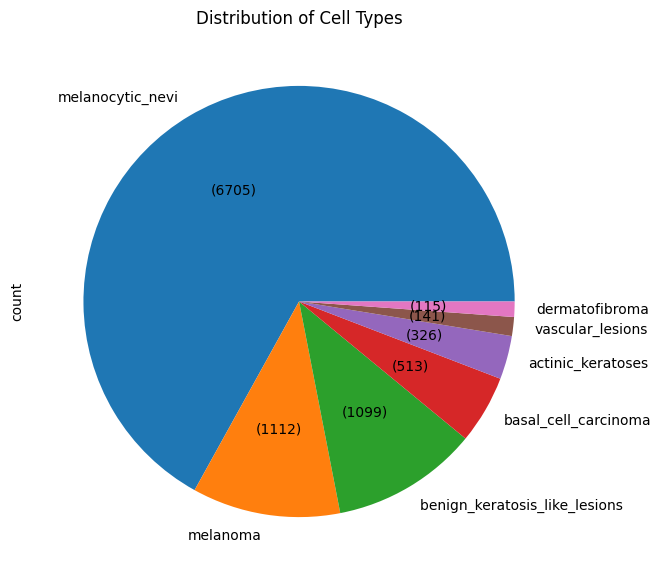

In [17]:
fig, ax1=plt.subplots(1,1,figsize=(7,7))
ax1.set_title('Distribution of Cell Types')
skin_df['cell_type'].value_counts().plot(kind='pie', ax=ax1, autopct=lambda p: f'({int(p/100*len(skin_df))})')

<Axes: title={'center': 'Distribution of Diagnosis Types'}, ylabel='count'>

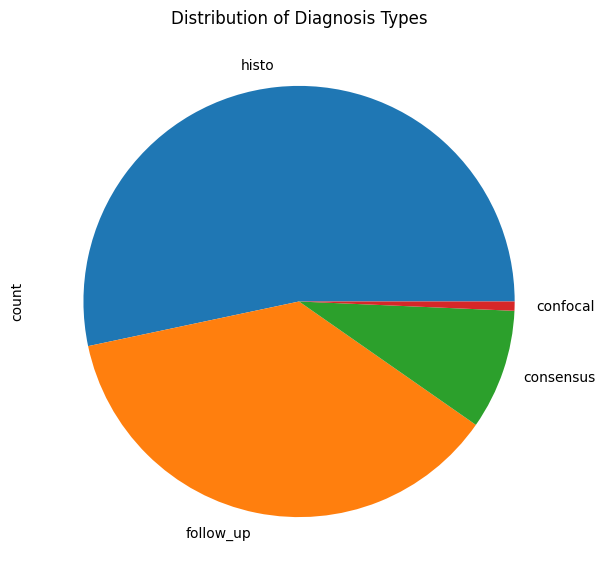

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize= (7, 7))
ax1.set_title('Distribution of Diagnosis Types')
skin_df['dx_type'].value_counts().plot(kind='pie',ax=ax1)

Text(0.5, 1.0, 'Different Localizations Category')

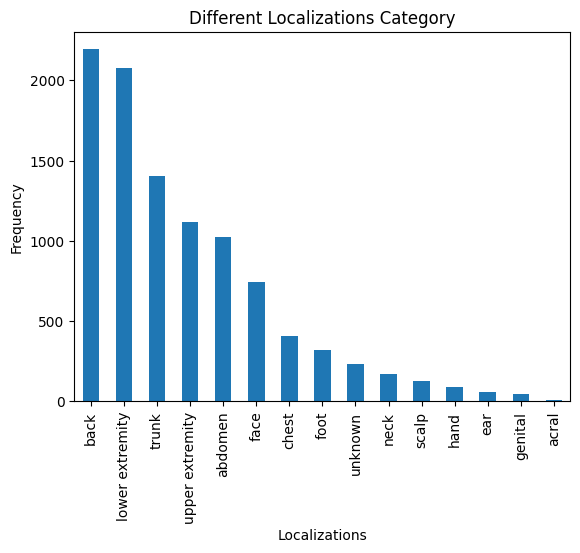

In [19]:
ax=skin_df['localization'].value_counts().plot(kind='bar')
ax.set_xlabel('Localizations')
ax.set_ylabel('Frequency')
ax.set_title('Different Localizations Category')

Text(0.5, 1.0, 'Distribution of Age')

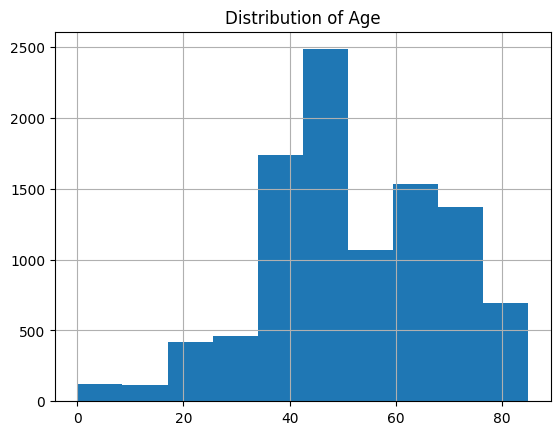

In [20]:
skin_df['age'].hist()
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Sex')

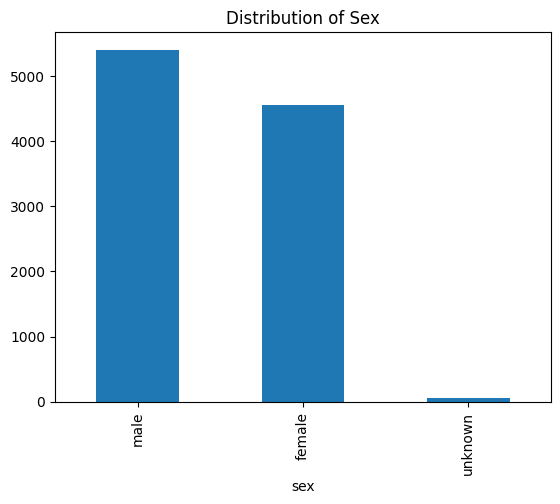

In [21]:
skin_df['sex'].value_counts().plot(kind='bar')
plt.title('Distribution of Sex')

Text(0.5, 1.0, 'Distribution of Age Across Cell Types')

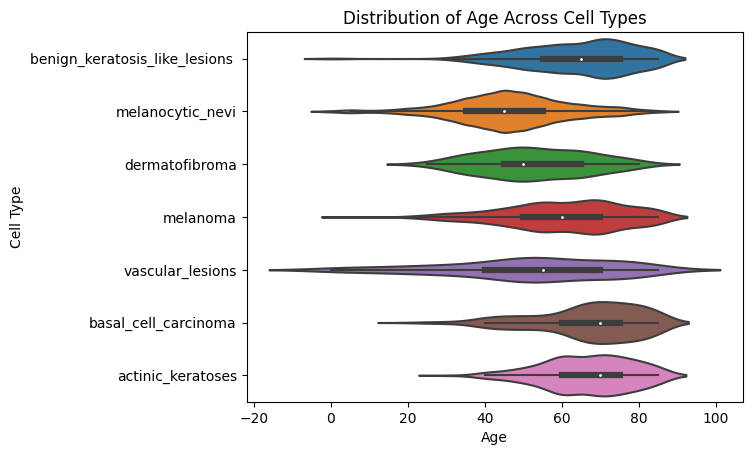

In [22]:
sns.violinplot(x='age', y='cell_type', data=skin_df)
plt.xlabel('Age')
plt.ylabel('Cell Type')
plt.title('Distribution of Age Across Cell Types')

Text(0.5, 1.0, 'Distribution of Cell Types Across Genders')

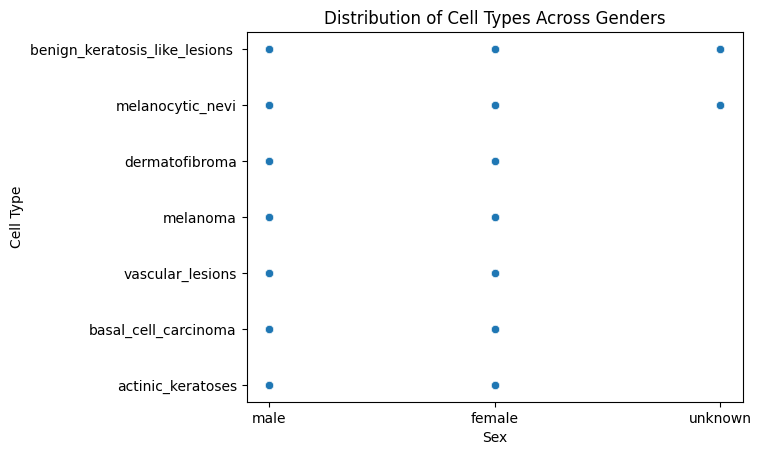

In [23]:
sns.scatterplot(x='sex', y='cell_type', data=skin_df)
plt.xlabel('Sex')
plt.ylabel('Cell Type')
plt.title('Distribution of Cell Types Across Genders')

In [24]:
# Resizing images to 75 x 100
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100, 75))))

In [25]:
# Checking whether image column is added to skin_df or not
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,benign_keratosis_like_lesions,2,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


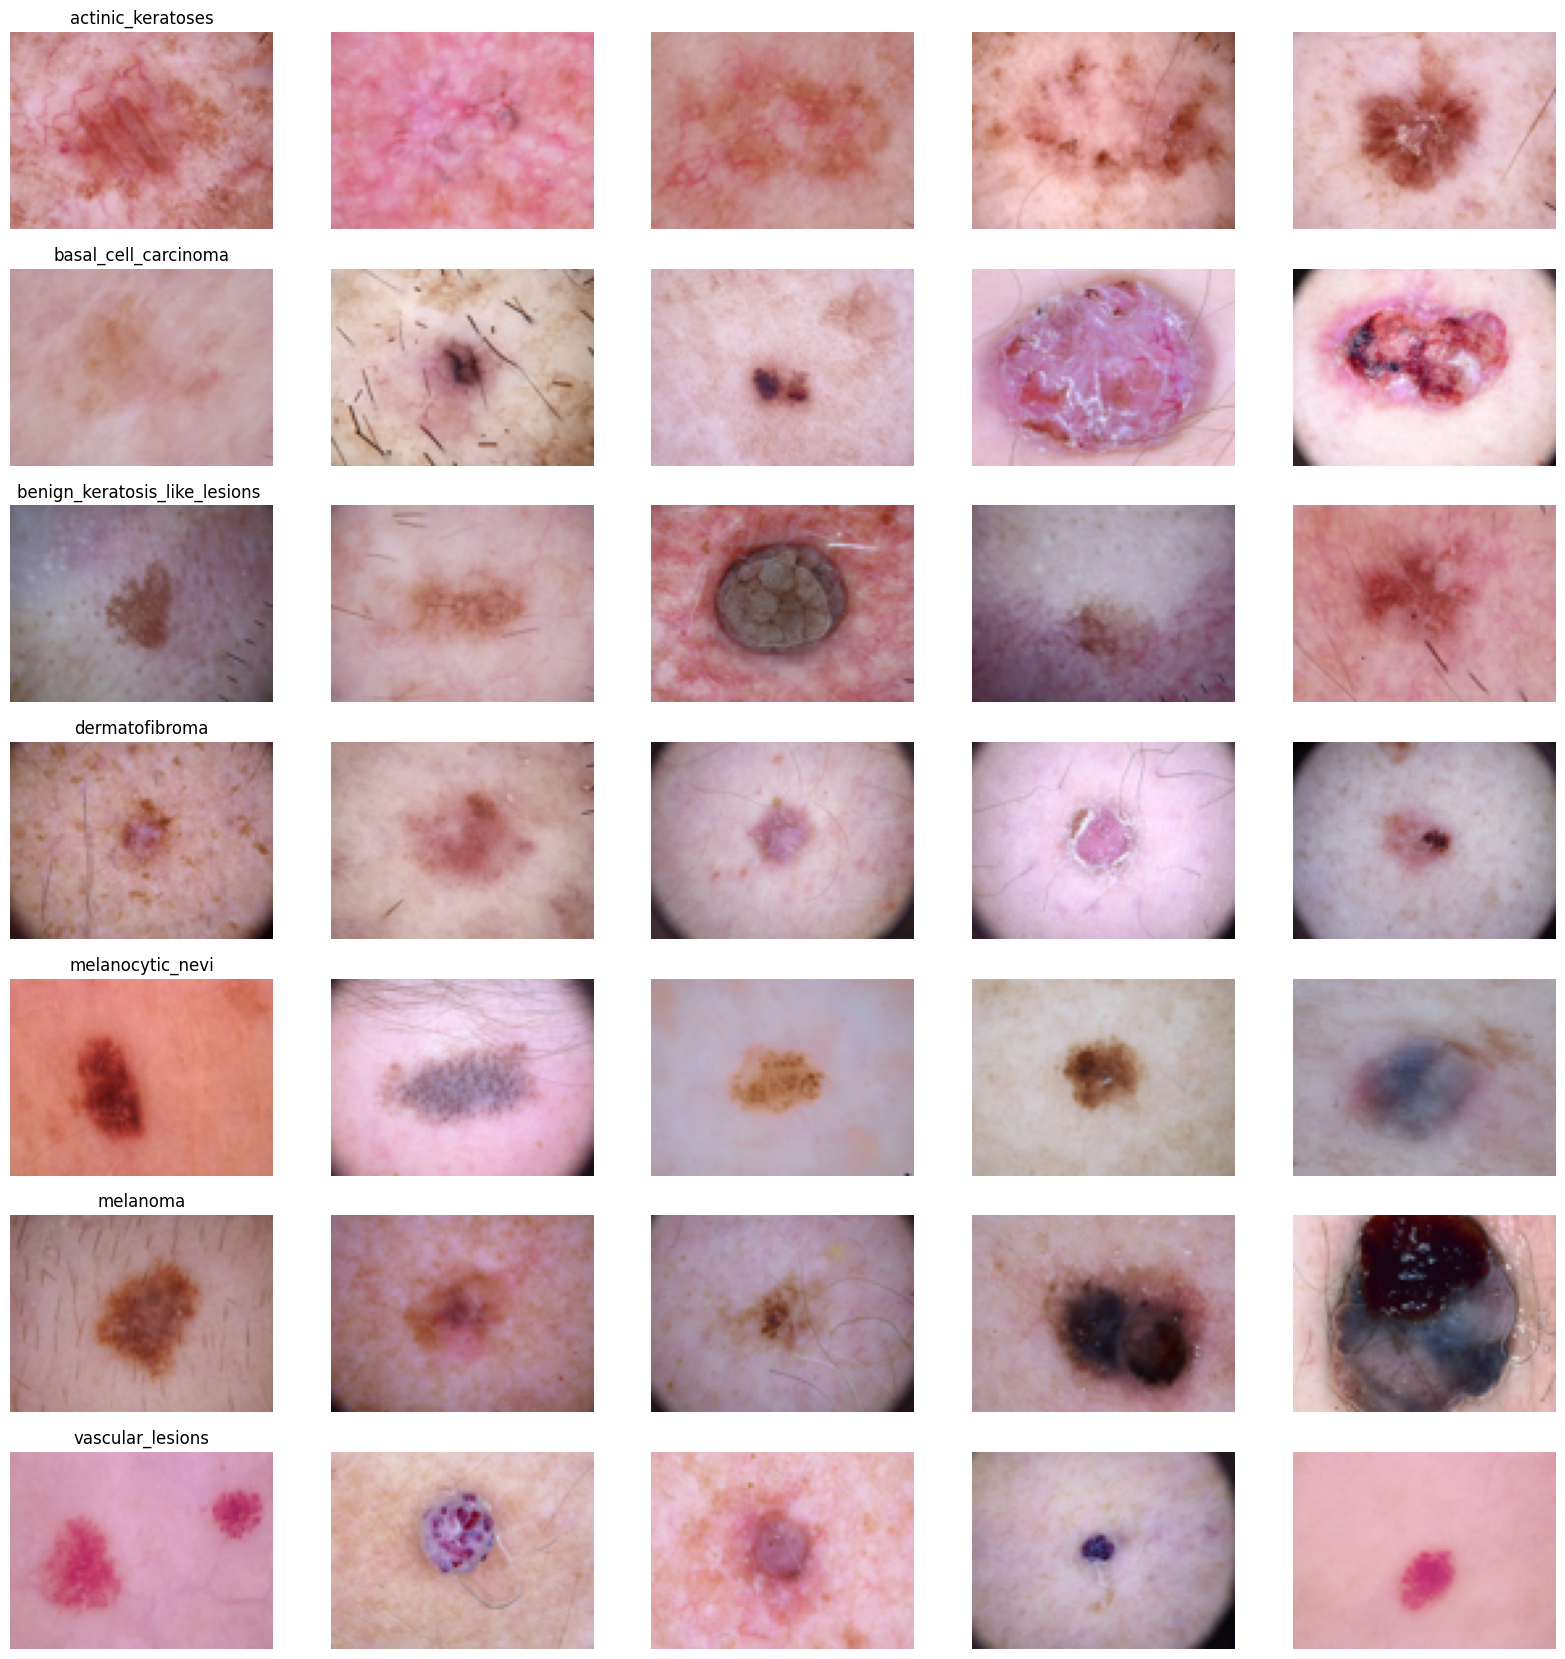

In [26]:
# Printing Sample images for each lesion type
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [27]:
# Checking the image size distribution
skin_df['image'].map(lambda x: x.shape).value_counts()

image
(75, 100, 3)    10015
Name: count, dtype: int64

In [28]:
df = skin_df.copy()

In [29]:
# Print number of instances of each class present to balance the data
class_counts = skin_df['cell_type'].value_counts()
print("Original class counts:")
print(class_counts)

Original class counts:
cell_type
melanocytic_nevi                  6705
melanoma                          1113
benign_keratosis_like_lesions     1099
basal_cell_carcinoma               514
actinic_keratoses                  327
vascular_lesions                   142
dermatofibroma                     115
Name: count, dtype: int64


In [30]:
# Balance data
n_samples = 6500

# Separate each class
dfs = []
for label_value in range(7):
    dfs.append(skin_df[skin_df['cell_type_idx'] == label_value])

# Resample and balance each class
balanced_dfs = []
for df_class in dfs:
    df_balanced = resample(df_class, replace=True, n_samples=n_samples, random_state=42)
    balanced_dfs.append(df_balanced)

# Combine back into a single dataframe
skin_df_balanced = pd.concat(balanced_dfs)

In [31]:
# Print class counts after balancing
print("\nClass counts after balancing:")
print(skin_df_balanced['cell_type'].value_counts())


Class counts after balancing:
cell_type
actinic_keratoses                 6500
basal_cell_carcinoma              6500
benign_keratosis_like_lesions     6500
dermatofibroma                    6500
melanocytic_nevi                  6500
melanoma                          6500
vascular_lesions                  6500
Name: count, dtype: int64


In [32]:
features=skin_df_balanced.drop(columns=['cell_type_idx'],axis=1)
target=skin_df_balanced['cell_type_idx']

In [33]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=3)

In [34]:
# Converting image data from matrix to list
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

# Normalizing the data
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std


In [35]:
# Perform one-hot encoding on the labels
num_classes = 7
y_train = to_categorical(y_train_o, num_classes)
y_test = to_categorical(y_test_o, num_classes)

In [36]:
# Splitting training data and validation data
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.20, random_state = 3)

In [37]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of x_validate:", x_validate.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_validate:", y_validate.shape)

Shape of x_train: (29120, 75, 100, 3)
Shape of x_test: (9100, 75, 100, 3)
Shape of x_validate: (7280, 75, 100, 3)
Shape of y_train: (29120, 7)
Shape of y_test: (9100, 7)
Shape of y_validate: (7280, 7)


In [38]:
# Define a function to resize images
def resize_image(image_array, target_size=(224, 224)):
    resized_images = []
    for image in image_array:
        # Convert NumPy array to PIL Image
        pil_image = Image.fromarray(image.astype('uint8'))
        # Resize the image
        resized_image = pil_image.resize(target_size)
        # Convert back to NumPy array
        resized_images.append(np.array(resized_image))
    return np.array(resized_images)

# Resize train, test, and validation images
x_train = resize_image(x_train)
x_test = resize_image(x_test)
x_validate = resize_image(x_validate)

In [39]:
# Resize y_train and y_validate to match the number of samples in the resized images
y_train = y_train[:x_train.shape[0]]
y_validate = y_validate[:x_validate.shape[0]]
y_test = y_test[:x_test.shape[0]]

In [40]:
# Checking the shape of resized images
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of x_validate:", x_validate.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_validate:", y_validate.shape)

Shape of x_train: (29120, 224, 224, 3)
Shape of x_test: (9100, 224, 224, 3)
Shape of x_validate: (7280, 224, 224, 3)
Shape of y_train: (29120, 7)
Shape of y_test: (9100, 7)
Shape of y_validate: (7280, 7)


In [41]:
# Clear GPU memory
K.clear_session()

In [42]:
from keras.applications import EfficientNetB1

# Load pre-trained EfficientNetB1 model
pretrained_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model so they won't be updated during training
for layer in pretrained_model.layers:
    layer.trainable = False


27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [43]:
# Add custom classification head
x = pretrained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [44]:
from tensorflow.keras.models import Model  # Import the Model class

# Combine base model with custom head
model = Model(inputs=pretrained_model.input, outputs=predictions)


In [45]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001)

In [46]:
# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [47]:
# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 7,894,158 (30.11 MB)

 Trainable params: 1,318,919 (5.03 MB)

 Non-trainable params: 6,575,239 (25.08 MB)

In [48]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',
    patience=4,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

In [49]:

# Initialize ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,          # Randomly rotate images in the range (degrees, 0 to 30)
    width_shift_range=0.2,      # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,     # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,            # Shear Intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,             # Randomly zoom images
    horizontal_flip=True,       # Randomly flip images horizontally
    vertical_flip=True,         # Randomly flip images vertically
    fill_mode='nearest'         # Fill mode for points outside the input boundaries
)


In [50]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_validate, y_validate))

Epoch 1/10


I0000 00:00:1714452749.918752     103 service.cc:145] XLA service 0x78263c018da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714452749.918822     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1714452749.918829     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/910 ━━━━━━━━━━━━━━━━━━━━ 1:01 68ms/step - accuracy: 0.1641 - loss: 1.9941   

I0000 00:00:1714452780.233852     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


910/910 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.5393 - loss: 1.2185 - val_accuracy: 0.7415 - val_loss: 0.6751
Epoch 2/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.7508 - loss: 0.6728 - val_accuracy: 0.8264 - val_loss: 0.4674
Epoch 3/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.8187 - loss: 0.4988 - val_accuracy: 0.8422 - val_loss: 0.4319
Epoch 4/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.8459 - loss: 0.4185 - val_accuracy: 0.8968 - val_loss: 0.2917
Epoch 5/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.8802 - loss: 0.3301 - val_accuracy: 0.9159 - val_loss: 0.2492
Epoch 6/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.8936 - loss: 0.2888 - val_accuracy: 0.9235 - val_loss: 0.2307
Epoch 7/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.9072 - loss: 0.2584 - val_accuracy: 0.9293 - val_loss: 0.2105
Epoch 8/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.9240 - loss: 0.2226 - val_accura

In [51]:
# Evaluating model accuracy and loss
loss, accuracy = model.evaluate(x_test, y_test)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

285/285 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9188 - loss: 0.2357
228/228 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9485 - loss: 0.1527
Validation: accuracy = 0.947253  ;  loss_v = 0.157302
Test: accuracy = 0.921538  ;  loss = 0.228924


In [52]:
# Get the predicted probabilities for the validation set
y_pred_prob = model.predict(x_validate)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute the classification report
report = classification_report(np.argmax(y_validate, axis=1), y_pred)
print(report)

228/228 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1065
           1       0.98      0.99      0.98      1033
           2       0.91      0.92      0.92      1048
           3       0.99      1.00      1.00      1041
           4       0.88      0.82      0.85      1065
           5       0.88      0.91      0.89      1012
           6       1.00      1.00      1.00      1016

    accuracy                           0.95      7280
   macro avg       0.95      0.95      0.95      7280
weighted avg       0.95      0.95      0.95      7280



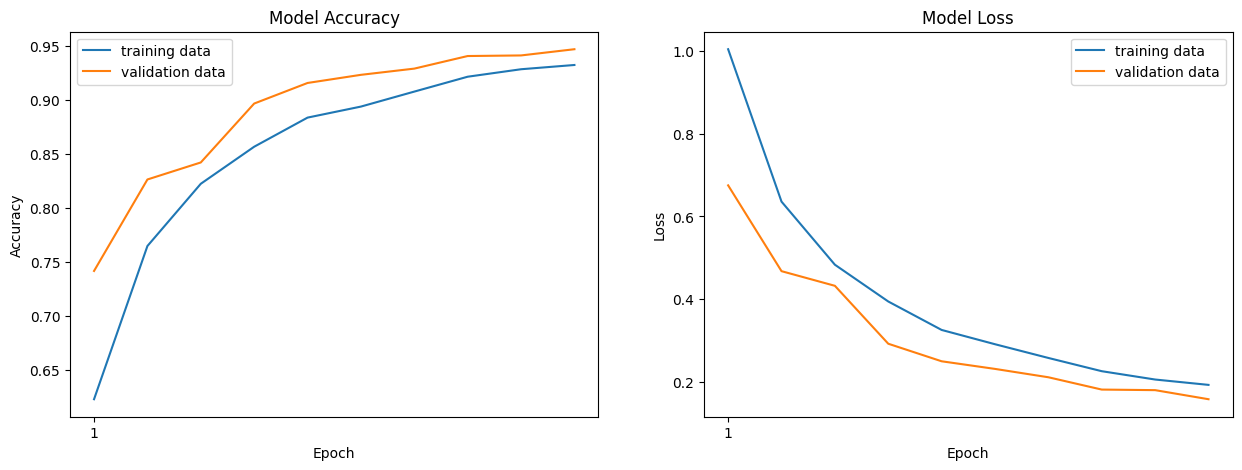

In [53]:
# plotting accuracy and loss of training data and validation data with progression in epochs during training process
model_history = history
fig, plots = plt.subplots(1,2,figsize=(15,5))
plots[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
plots[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
plots[0].set_title('Model Accuracy')
plots[0].set_ylabel('Accuracy')
plots[0].set_xlabel('Epoch')
ticks = np.arange(1, len(model_history.history['accuracy']) + 1, 10)
plots[0].set_xticks(ticks)
plots[0].legend(['training data', 'validation data'], loc='upper left')
plots[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
plots[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
plots[1].set_title('Model Loss')
plots[1].set_ylabel('Loss')
plots[1].set_xlabel('Epoch')
ticks = np.arange(1, len(model_history.history['loss']) + 1, 10)
plots[1].set_xticks(ticks)
plots[1].legend(['training data', 'validation data'], loc='upper right')
plt.show()


In [54]:
# Predicted values
Y_pred = model.predict(x_validate)
Y_pred_test = model.predict(x_test)
# Converting to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_pred_test_classes = np.argmax(Y_pred_test,axis = 1)
Y_true = np.argmax(y_test,axis = 1) 

228/228 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step


In [55]:
model.save("scr_skin_cnn_efficientNetB1.h5")

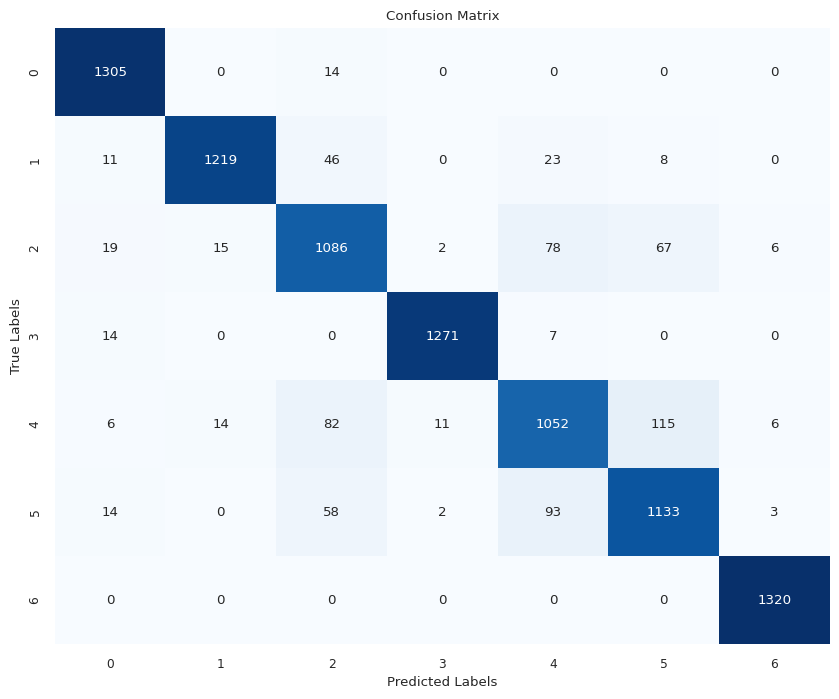

In [56]:
# confusion matrix calculation
confusion_mtx = confusion_matrix(Y_true, Y_pred_test_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.8)  # Adjust font scale if needed
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

285/285 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step


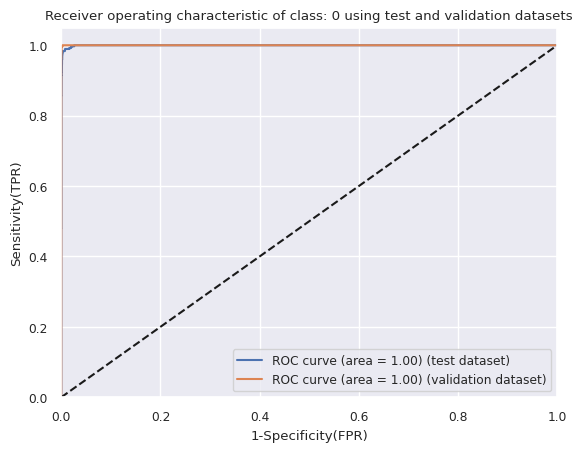

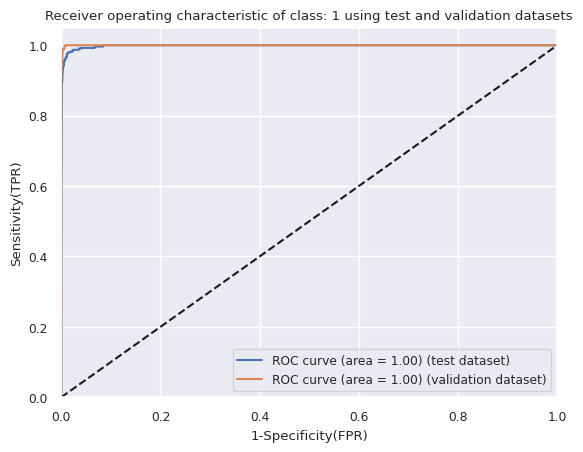

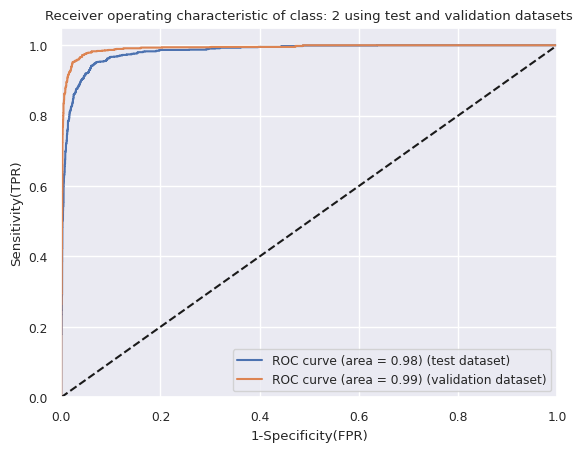

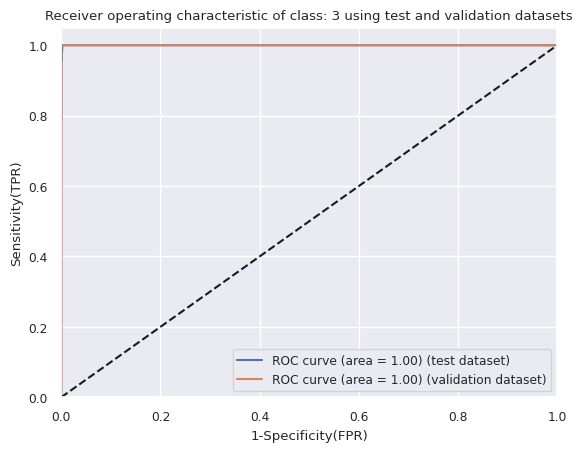

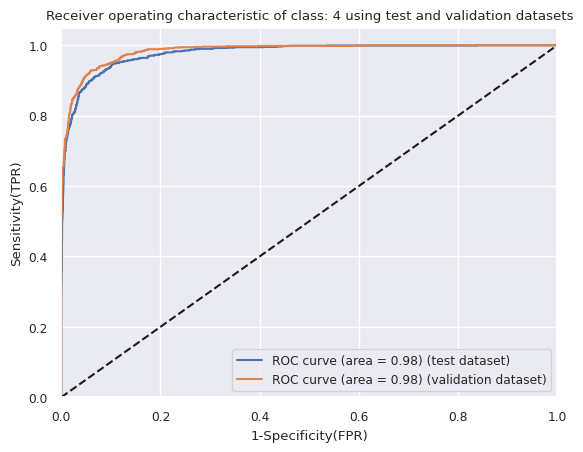

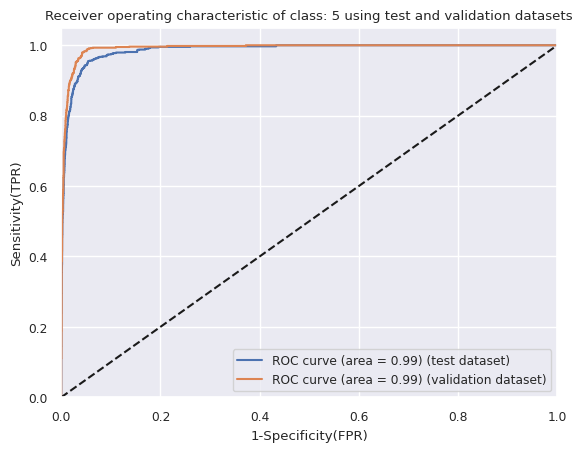

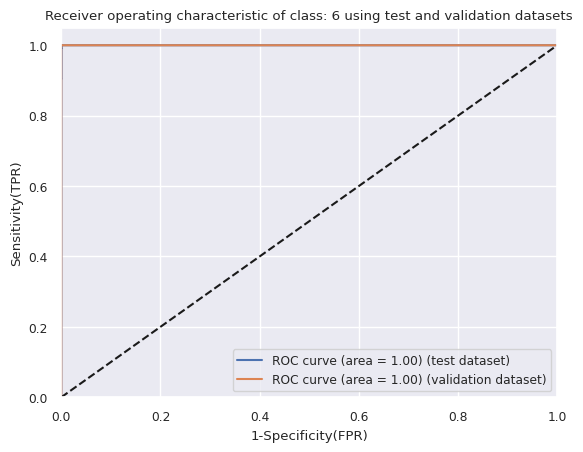

In [57]:
y_pred_test = model.predict(x_test)
y_pred_val = model.predict(x_validate)
num_classes=7

fpr_val = dict()
tpr_val = dict()
roc_auc_val = dict()
fpr_test = dict()
tpr_test= dict()
roc_auc_test = dict()
for i in range(num_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test[:, i], y_pred_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_val[i], tpr_val[i], _ = roc_curve(y_validate[:, i], y_pred_val[:, i])
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr_test[i], tpr_test[i], label='ROC curve (area = %0.2f) (test dataset)' % roc_auc_test[i])
    plt.plot(fpr_val[i], tpr_val[i], label='ROC curve (area = %0.2f) (validation dataset)' % roc_auc_val[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(FPR)')
    plt.ylabel('Sensitivity(TPR)')
    plt.title('Receiver operating characteristic of class: '+ str(i) + ' using test and validation datasets' )
    plt.legend(loc="lower right")
    plt.show()

Text(0, 0.5, 'Correctly Classified Fraction')

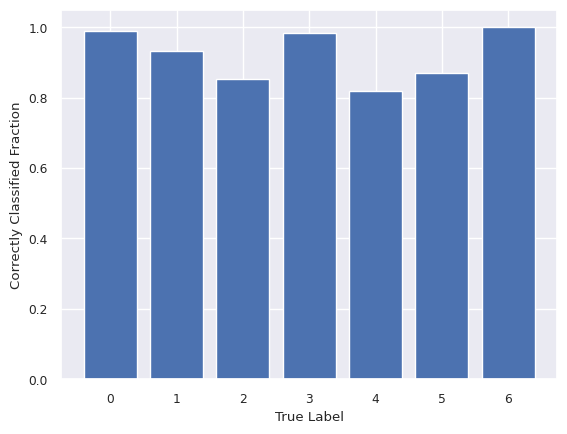

In [58]:
correctly_predicted_frac = np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),correctly_predicted_frac )
plt.xlabel('True Label')
plt.ylabel('Correctly Classified Fraction')

Text(0, 0.5, 'Incorrectly Classified Fraction')

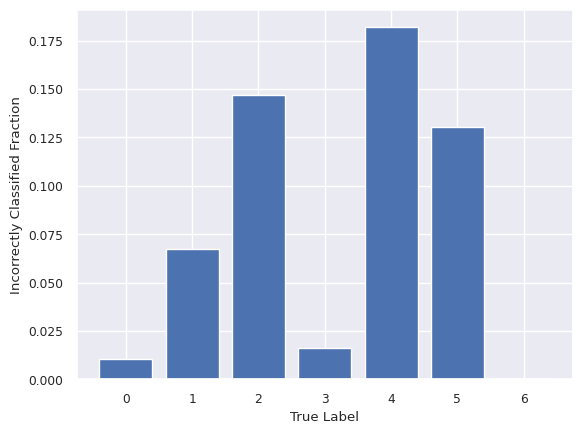

In [59]:
incorrectly_predicted_frac = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),incorrectly_predicted_frac )
plt.xlabel('True Label')
plt.ylabel('Incorrectly Classified Fraction')